In [83]:
include("DG_Methods.jl")

vsparse_reconstruct_DG (generic function with 1 method)

In [2]:
function Full_Dict2Vec{D,T<:Real}(k::Int, coefficients::Dict{CartesianIndex{D}, Array{Array{T},D}}, ls::NTuple{D,Int})
	j=1
	size=0
	f_numbers= ntuple(q-> k, D)
	for level in CartesianRange(ls)
		ks = ntuple(q -> 1<<pos(level[q]-2), D)
		size+=prod(ks)*k^D
	end
	vect = Array(Float64,size)
    for level in CartesianRange(ls)     # This really goes from 0 to l_i for each i,
        ks = ntuple(q -> 1<<pos(level[q]-2), D)  #This sets up a specific k+1 vector
        for place in CartesianRange(ks)
			for f_number in CartesianRange(f_numbers)
                vect[j]=coefficients[level][place][f_number]
				j+=1
            end
        end
    end
	return vect
end

function Sparse_Dict2Vec{D,T<:Real}(k::Int, coefficients::Dict{CartesianIndex{D}, Array{Array{T},D}}, n::Int)
	j=1
	size = 0
	f_numbers= ntuple(i-> k, D)
    ls = ntuple(i->(n+1),D)
    for level in CartesianRange(ls) #This really goes from 0 to l_i for each i
        diag_level=0;
        for q in 1:D
            diag_level+=level[q]
        end
        if diag_level > n + D #If we're past the levels we care about, don't compute coeffs
            continue
        end  #Otherwise we'll go ahead and DO IT. The same code follows as before.
		ks = ntuple(q -> 1<<pos(level[q]-2), D)
		size+=prod(ks)*k^D
	end
	vect = Array(Float64,size)
    for level in CartesianRange(ls) #This really goes from 0 to l_i for each i
        diag_level=0;
        for q in 1:D
            diag_level+=level[q]
        end
        if diag_level > n + D #If we're past the levels we care about, don't compute coeffs
            continue
        end  #Otherwise we'll go ahead and DO IT. The same code follows as before.
	    ks = ntuple(q -> 1<<pos(level[q]-2), D)  #This sets up a specific k+1 vector
	    for place in CartesianRange(ks)
            for f_number in CartesianRange(f_numbers)
                vect[j] = coefficients[level][place][f_number]
				j+=1
            end
        end
    end
    return vect
end



function Full_Vec2Dict{D,T<:Real}(k::Int, vect::Array{T}, ls::NTuple{D,Int})
    coeffs = Dict{CartesianIndex{D}, Array{Array{Float64},D}}()
	f_numbers= ntuple(q-> k, D)
	j=1
	for level in CartesianRange(ls)     # This really goes from 0 to l_i for each i,
        ks = ntuple(q -> 1<<pos(level[q]-2), D)  #This sets up a specific k+1 vector
        level_coeffs = Array(Array{Float64},ks)	 #all the coefficients at this level
        for place in CartesianRange(ks)
            level_coeffs[place]=Array(Float64,f_numbers)
			for f_number in CartesianRange(f_numbers)
                level_coeffs[place][f_number]=vect[j]
				j+=1
            end
        end
		coeffs[level] = level_coeffs
    end
	return coeffs
end

function Sparse_Vec2Dict{T<:Real}(k::Int, vect::Array{T}, n::Int, D::Int)
    coeffs = Dict{CartesianIndex{D}, Array{Array{Float64},D}}()
	f_numbers= ntuple(q-> k, D)
    ls = ntuple(i->(n+1),D)
	j=1
	for level in CartesianRange(ls) #This really goes from 0 to l_i for each i
        diag_level=0;
        for q in 1:D
            diag_level+=level[q]
        end
        if diag_level > n + D #If we're past the levels we care about, don't compute coeffs
            continue
        end  #Otherwise we'll go ahead and DO IT. The same code follows as before.
        ks = ntuple(q -> 1<<pos(level[q]-2), D)  #This sets up a specific k+1 vector
        level_coeffs = Array(Array{Float64},ks)	 #all the coefficients at this level
        for place in CartesianRange(ks)
            level_coeffs[place]=Array(Float64,f_numbers)
			for f_number in CartesianRange(f_numbers)
                level_coeffs[place][f_number]=vect[j]
				j+=1
            end
        end
		coeffs[level] = level_coeffs
    end
	return coeffs
end

function enumerate_basis_number{D}(lvl::NTuple{D, Int},place::CartesianRange{D}, f_number::CartesianRange{D},i)
	if i<=D
		return lvl[i]
	elseif i<=2D
		return place[i-D]
	else 
		return f_number[i-2*D]
	end
end

function full_reference_vector{D}(k::Int, ls::NTuple{D,Int})
	j=1
	size=0
	f_numbers= ntuple(q-> k, D)
	for level in CartesianRange(ls)
		ks = ntuple(q -> 1<<pos(level[q]-2), D)
		size+=prod(ks)*k^D
	end
	vect = Array(NTuple{3*D},size)
    for level in CartesianRange(ls)     # This really goes from 0 to l_i for each i,
        ks = ntuple(q -> 1<<pos(level[q]-2), D)  #This sets up a specific k+1 vector
		lvl = ntuple(i -> level[i]-1,D)
		
        for place in CartesianRange(ks)
			for f_number in CartesianRange(f_numbers)
                vect[j]=ntuple(i->enumerate_basis_number(lvl,place,fnumber,i),3*D)
				j+=1
            end
        end
    end
	return vect
end

function sparse_reference_vector(k::Int,n::Int,D::Int)
	j=1
	size=0
	f_numbers= ntuple(q-> k, D)
	for level in CartesianRange(ls)
		ks = ntuple(q -> 1<<pos(level[q]-2), D)
		size+=prod(ks)*k^D
	end
	vect = Array(NTuple{3*D},size)
    for level in CartesianRange(ls)
        diag_level=0;
        for q in 1:D
            diag_level+=level[q]
        end
        if diag_level > n + D #If we're past the levels we care about, don't compute coeffs
            continue
		end
        ks = ntuple(q -> 1<<pos(level[q]-2), D)  #This sets up a specific k+1 vector
		lvl = ntuple(i -> level[i]-1,D)
        for place in CartesianRange(ks)
			for f_number in CartesianRange(f_numbers)
                vect[j]=ntuple(i->enumerate_basis_number(lvl,place,fnumber,i),3*D)
				j+=1
            end
        end
    end
	return vect
end


sparse_reference_vector (generic function with 1 method)

In [3]:
coeffs = sparse_coefficients_DG(1,(x->sin(pi*x[1])), 3,2)

vect= Sparse_Dict2Vec(1,coeffs, 3)
@show Sparse_Vec2Dict(1,vect, 3, 2)

Sparse_Vec2Dict(1,vect,3,2) = Dict(CartesianIndex{2}((1,3))=>Array{Float64,N}[[1.734723475976807e-18] [1.734723475976807e-18]],CartesianIndex{2}((3,1))=>Array{Float64,N}[[0.1864616142890404]
                 [-0.18646161428904046]],CartesianIndex{2}((3,2))=>Array{Float64,N}[[-1.1121520371304427e-12]
                 [-1.1121763232591064e-12]],CartesianIndex{2}((4,1))=>Array{Float64,N}[[0.08954202491867713]
                 [0.0370895211236657]
                 [-0.03708952112366565]
                 [-0.08954202491867709]],CartesianIndex{2}((1,2))=>Array{Float64,N}[[7.864282142167056e-13]],CartesianIndex{2}((1,1))=>Array{Float64,N}[[0.6366197723676228]],CartesianIndex{2}((2,1))=>Array{Float64,N}[[5.551115123125783e-17]],CartesianIndex{2}((2,3))=>Array{Float64,N}[[1.214306433183765e-17] [1.214306433183765e-17]],CartesianIndex{2}((2,2))=>Array{Float64,N}[[7.864316836636576e-13]],CartesianIndex{2}((1,4))=>Array{Float64,N}[[3.932132397466148e-13] [3.932132397466148e-13] [3.932132397466148e

Dict{CartesianIndex{2},Array{Array{Float64,N},2}} with 10 entries:
  CartesianIndex{2}((1,3)) => 1x2 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((3,1)) => 2x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((3,2)) => 2x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((4,1)) => 4x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((1,2)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((1,1)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((2,1)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((2,3)) => 1x2 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((2,2)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((1,4)) => 1x4 Array{Array{Float64,N},2}:…

In [4]:
coeffs

Dict{CartesianIndex{2},Array{Array{Float64,N},2}} with 10 entries:
  CartesianIndex{2}((1,3)) => 1x2 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((3,1)) => 2x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((3,2)) => 2x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((4,1)) => 4x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((1,2)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((1,1)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((2,1)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((2,3)) => 1x2 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((2,2)) => 1x1 Array{Array{Float64,N},2}:…
  CartesianIndex{2}((1,4)) => 1x4 Array{Array{Float64,N},2}:…

In [5]:
vect

20-element Array{Float64,1}:
  0.63662    
  5.55112e-17
  0.186462   
 -0.186462   
  0.089542   
  0.0370895  
 -0.0370895  
 -0.089542   
  7.86428e-13
  7.86432e-13
 -1.11215e-12
 -1.11218e-12
  1.73472e-18
  1.73472e-18
  1.21431e-17
  1.21431e-17
  3.93213e-13
  3.93213e-13
  3.93213e-13
  3.93213e-13

In [7]:
function sparseSize(k,n,D)
    size=0
    ls = ntuple(i-> (n+1),D)
    for level in CartesianRange(ls) #This really goes from 0 to l_i for each i
        diag_level=0;
        for q in 1:D
            diag_level+=level[q]
        end
        if diag_level > n + D #If we're past the levels we care about, don't compute coeffs
            continue
        end  
        ks = ntuple(q -> 1<<pos(level[q]-2), D)
        size+=prod(ks)*k^D
    end
    return size
end

sparseSize (generic function with 1 method)

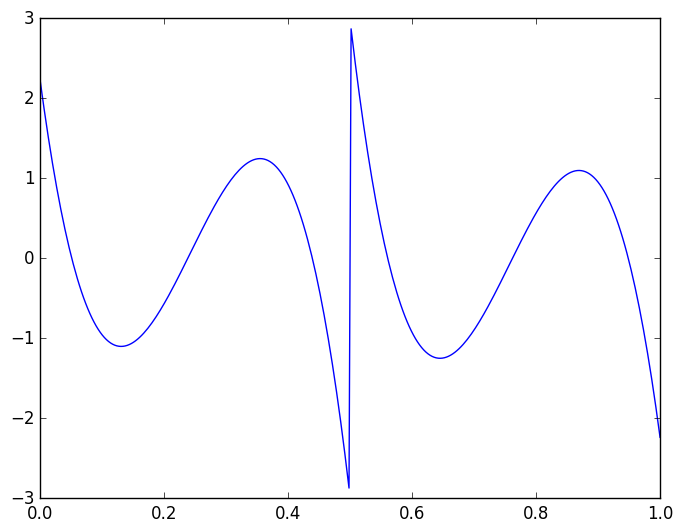

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f1384d0>

In [120]:

plotfunc1D(x->v(4,1,1,3,x[1]))


In [123]:
v(4,1,1,3,0.5),v(4,1,1,3,0)

(2.9814239699993954,2.236067977499419)

In [113]:
include("Precompute_Gaps.jl")

gap_vals1D (generic function with 1 method)

In [124]:
@time gap_vals1D(4,1,3)

  0.000006 seconds (7 allocations: 304 bytes)


4-element Array{Float64,1}:
  2.23607
 -2.98142
  2.98142
 -2.23607